In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv('./data.csv')
dataset.head()

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset = np.array(dataset)

In [5]:
dataset.shape

(99, 2)

In [6]:
split_factor = 0.8
split = int(split_factor * dataset.shape[0])
split

79

In [7]:
#Splitting dataset into train and test data
X_train = dataset[:split,0]
X_test = dataset[split:,0]
y_train = dataset[:split,1]
y_test = dataset[split:,1]

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79,)
(20,)
(79,)
(20,)


In [9]:
def cost(X,y,m,c):
    error = 0
    for i in range(len(X)):
        error += (y[i] - (m * X[i] + c)) ** 2
    
    return error / (2 * len(X))

In [10]:
def step_gradient(X,y,m,c,lr):
    slope = 0
    intercept = 0
    for i in range(len(X)):
        slope += (1/len(X)) * (y[i] - (m * X[i] + c)) * X[i]
        intercept += (1/len(X)) * (y[i] - (m * X[i] + c))
    
    m += lr * slope
    c += lr * intercept
    return [m,c]

In [11]:
def gradient(X,y,m,c,lr,num_steps):
    for i in range(num_steps):
        m,c = step_gradient(X,y,m,c,lr)
        if(i%100 == 0):
            error = cost(X,y,m,c)
            print("error after {} iterations {}".format(i,error))
    
    return [m,c]

In [12]:
def run(X,y,num_steps = 1000):
    learning_rate = 0.0001
    error = 0
    m = 0
    c = 0
    m,c = gradient(X,y,m,c,learning_rate,num_steps)
    error = cost(X,y,m,c)
    
    return [m,c,error]

In [13]:
m,c,error = run(X_train,y_train)

error after 0 iterations 1558.238214606866
error after 100 iterations 56.73454658378947
error after 200 iterations 56.73396968364215
error after 300 iterations 56.73339318382789
error after 400 iterations 56.73281708406897
error after 500 iterations 56.73224138408767
error after 600 iterations 56.73166608360669
error after 700 iterations 56.73109118234875
error after 800 iterations 56.730516680036736
error after 900 iterations 56.72994257639392


In [14]:
print("slope : {}".format(m))
print("intercept : {}".format(c))
print("error : {}".format(error))

slope : 1.4621003153751813
intercept : 0.052819936484252684
error : 56.729374606224994


In [15]:
y_pred = m * X_test + c
y_pred.shape

(20,)

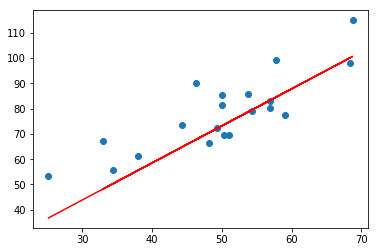

In [16]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')